# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)

# Clase 16
#  Aprendizaje no supervisado
## Repaso de Agrupación K-medias, jerárquica y DBSCAN

# Taller de Clustering
## Objetivos:
1. Comprender y aplicar técnicas de clustering para la clasificación de datos.
2. Utilizar Python y librerías de Machine Learning para implementar modelos de clustering.
3. Analizar y visualizar los resultados de los modelos de clustering.



### Paso 1: Preparación del Entorno

In [ ]:
#!pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings('ignore')

### Paso 2: Cargar y Explorar los Datos

In [2]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Cancer.csv"
datos=pd.read_csv(url, sep=";", index_col=0)
datos

,Tipo,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,Simetria,...,Radio_WM,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,1799,1038,1228,1001,1184,2776,3001,1471,2419,...,2538,1733,1846,2019,1622,6656,7119,2654,4601,1189
842517,M,2057,1777,1329,1326,8474,7864,869,7017,1812,...,2499,2341,1588,1956,1238,1866,2416,186,275,8902
84300903,M,1969,2125,130,1203,1096,1599,1974,1279,2069,...,2357,2553,1525,1709,1444,4245,4504,243,3613,8758
84348301,M,1142,2038,7758,3861,1425,2839,2414,1052,2597,...,1491,265,9887,5677,2098,8663,6869,2575,6638,173
84358402,M,2029,1434,1351,1297,1003,1328,198,1043,1809,...,2254,1667,1522,1575,1374,205,4,1625,2364,7678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,2156,2239,142,1479,111,1159,2439,1389,1726,...,2545,264,1661,2027,141,2113,4107,2216,206,7115
926682,M,2013,2825,1312,1261,978,1034,144,9791,1752,...,2369,3825,155,1731,1166,1922,3215,1628,2572,6637
926954,M,166,2808,1083,8581,8455,1023,9251,5302,159,...,1898,3412,1267,1124,1139,3094,3403,1418,2218,782


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tipo             569 non-null    object
 1   Radio            569 non-null    int64 
 2   Textura          569 non-null    int64 
 3   Perimetro        569 non-null    int64 
 4   Area             569 non-null    int64 
 5   Suavidad         569 non-null    int64 
 6   Compacidad       569 non-null    int64 
 7   Concavidad       569 non-null    int64 
 8   Puntos_Conca     569 non-null    int64 
 9   Simetria         569 non-null    int64 
 10  Fractal          569 non-null    int64 
 11  Radio_SE         569 non-null    int64 
 12  Textura_SE       569 non-null    int64 
 13  Perimetro_SE     569 non-null    int64 
 14  Area_SE          569 non-null    int64 
 15  Suavidad_SE      569 non-null    int64 
 16  Compacidad_SE    569 non-null    int64 
 17  Concavidad_SE    569 non-null    

In [13]:
data_unique=np.unique(datos[['Tipo']])
data_unique

array(['B', 'M'], dtype=object)

In [15]:
datos["tipo_num"] = np.where(datos["Tipo"]=="M",1,0)
datos.describe()

,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,Simetria,Fractal,...,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM,tipo_num
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1890.249561,1773.845343,5531.847100,4241.031634,5377.936731,3980.750439,3182.627417,3688.309315,1647.008787,5670.022847,...,2330.068541,4585.732865,4415.365554,1805.435852,3057.961336,3342.871705,3522.813708,2580.330404,6252.123023,0.372583
std,2156.956604,653.157772,3406.435565,2414.490302,3913.073822,2988.912750,2539.018050,2807.699479,551.012773,1881.666060,...,951.514823,3666.059335,2635.459324,2096.251655,2246.821754,2387.594539,2925.740804,1042.826437,2974.589232,0.483918
min,9.000000,17.000000,63.000000,181.000000,1.000000,6.000000,0.000000,0.000000,18.000000,6.000000,...,18.000000,78.000000,248.000000,13.000000,1.000000,0.000000,0.000000,3.000000,12.000000,0.000000
25%,1154.000000,1518.000000,1283.000000,2212.000000,1071.000000,1289.000000,1357.000000,1471.000000,1555.000000,5636.000000,...,1949.000000,1159.000000,1724.000000,1166.000000,1574.000000,1521.000000,1339.000000,2355.000000,6037.000000,0.000000
50%,1351.000000,1832.000000,7138.000000,4376.000000,7721.000000,2839.000000,2367.000000,2799.000000,1739.000000,6077.000000,...,2462.000000,1846.000000,4709.000000,1327.000000,2376.000000,2884.000000,2089.000000,2741.000000,7313.000000,0.000000
75%,1727.000000,2154.000000,8305.000000,5848.000000,8946.000000,6698.000000,4479.000000,5736.000000,1943.000000,6566.000000,...,2926.000000,8411.000000,6384.000000,1494.000000,4002.000000,4704.000000,6136.000000,3113.000000,8194.000000,1.000000
max,9904.000000,3928.000000,9958.000000,9989.000000,9997.000000,9965.000000,9966.000000,9961.000000,2906.000000,9744.000000,...,4954.000000,9971.000000,9936.000000,9994.000000,9995.000000,9996.000000,9993.000000,6638.000000,9981.000000,1.000000


In [6]:
datos.describe()

,Radio,Textura,Perimetro,Area,Suavidad,Compacidad,Concavidad,Puntos_Conca,Simetria,Fractal,...,Radio_WM,Textura_WM,Perimetro_WM,Area_WM,Suavidad_WM,Compacidad_WM,Concavidad_WM,Puntos_Conca_WM,Simetria_WM,Fractal_WM
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1890.249561,1773.845343,5531.847100,4241.031634,5377.936731,3980.750439,3182.627417,3688.309315,1647.008787,5670.022847,...,1756.618629,2330.068541,4585.732865,4415.365554,1805.435852,3057.961336,3342.871705,3522.813708,2580.330404,6252.123023
std,2156.956604,653.157772,3406.435565,2414.490302,3913.073822,2988.912750,2539.018050,2807.699479,551.012773,1881.666060,...,1528.979979,951.514823,3666.059335,2635.459324,2096.251655,2246.821754,2387.594539,2925.740804,1042.826437,2974.589232
min,9.000000,17.000000,63.000000,181.000000,1.000000,6.000000,0.000000,0.000000,18.000000,6.000000,...,14.000000,18.000000,78.000000,248.000000,13.000000,1.000000,0.000000,0.000000,3.000000,12.000000
25%,1154.000000,1518.000000,1283.000000,2212.000000,1071.000000,1289.000000,1357.000000,1471.000000,1555.000000,5636.000000,...,1247.000000,1949.000000,1159.000000,1724.000000,1166.000000,1574.000000,1521.000000,1339.000000,2355.000000,6037.000000
50%,1351.000000,1832.000000,7138.000000,4376.000000,7721.000000,2839.000000,2367.000000,2799.000000,1739.000000,6077.000000,...,1485.000000,2462.000000,1846.000000,4709.000000,1327.000000,2376.000000,2884.000000,2089.000000,2741.000000,7313.000000
75%,1727.000000,2154.000000,8305.000000,5848.000000,8946.000000,6698.000000,4479.000000,5736.000000,1943.000000,6566.000000,...,1928.000000,2926.000000,8411.000000,6384.000000,1494.000000,4002.000000,4704.000000,6136.000000,3113.000000,8194.000000
max,9904.000000,3928.000000,9958.000000,9989.000000,9997.000000,9965.000000,9966.000000,9961.000000,2906.000000,9744.000000,...,9981.000000,4954.000000,9971.000000,9936.000000,9994.000000,9995.000000,9996.000000,9993.000000,6638.000000,9981.000000


<Axes: >

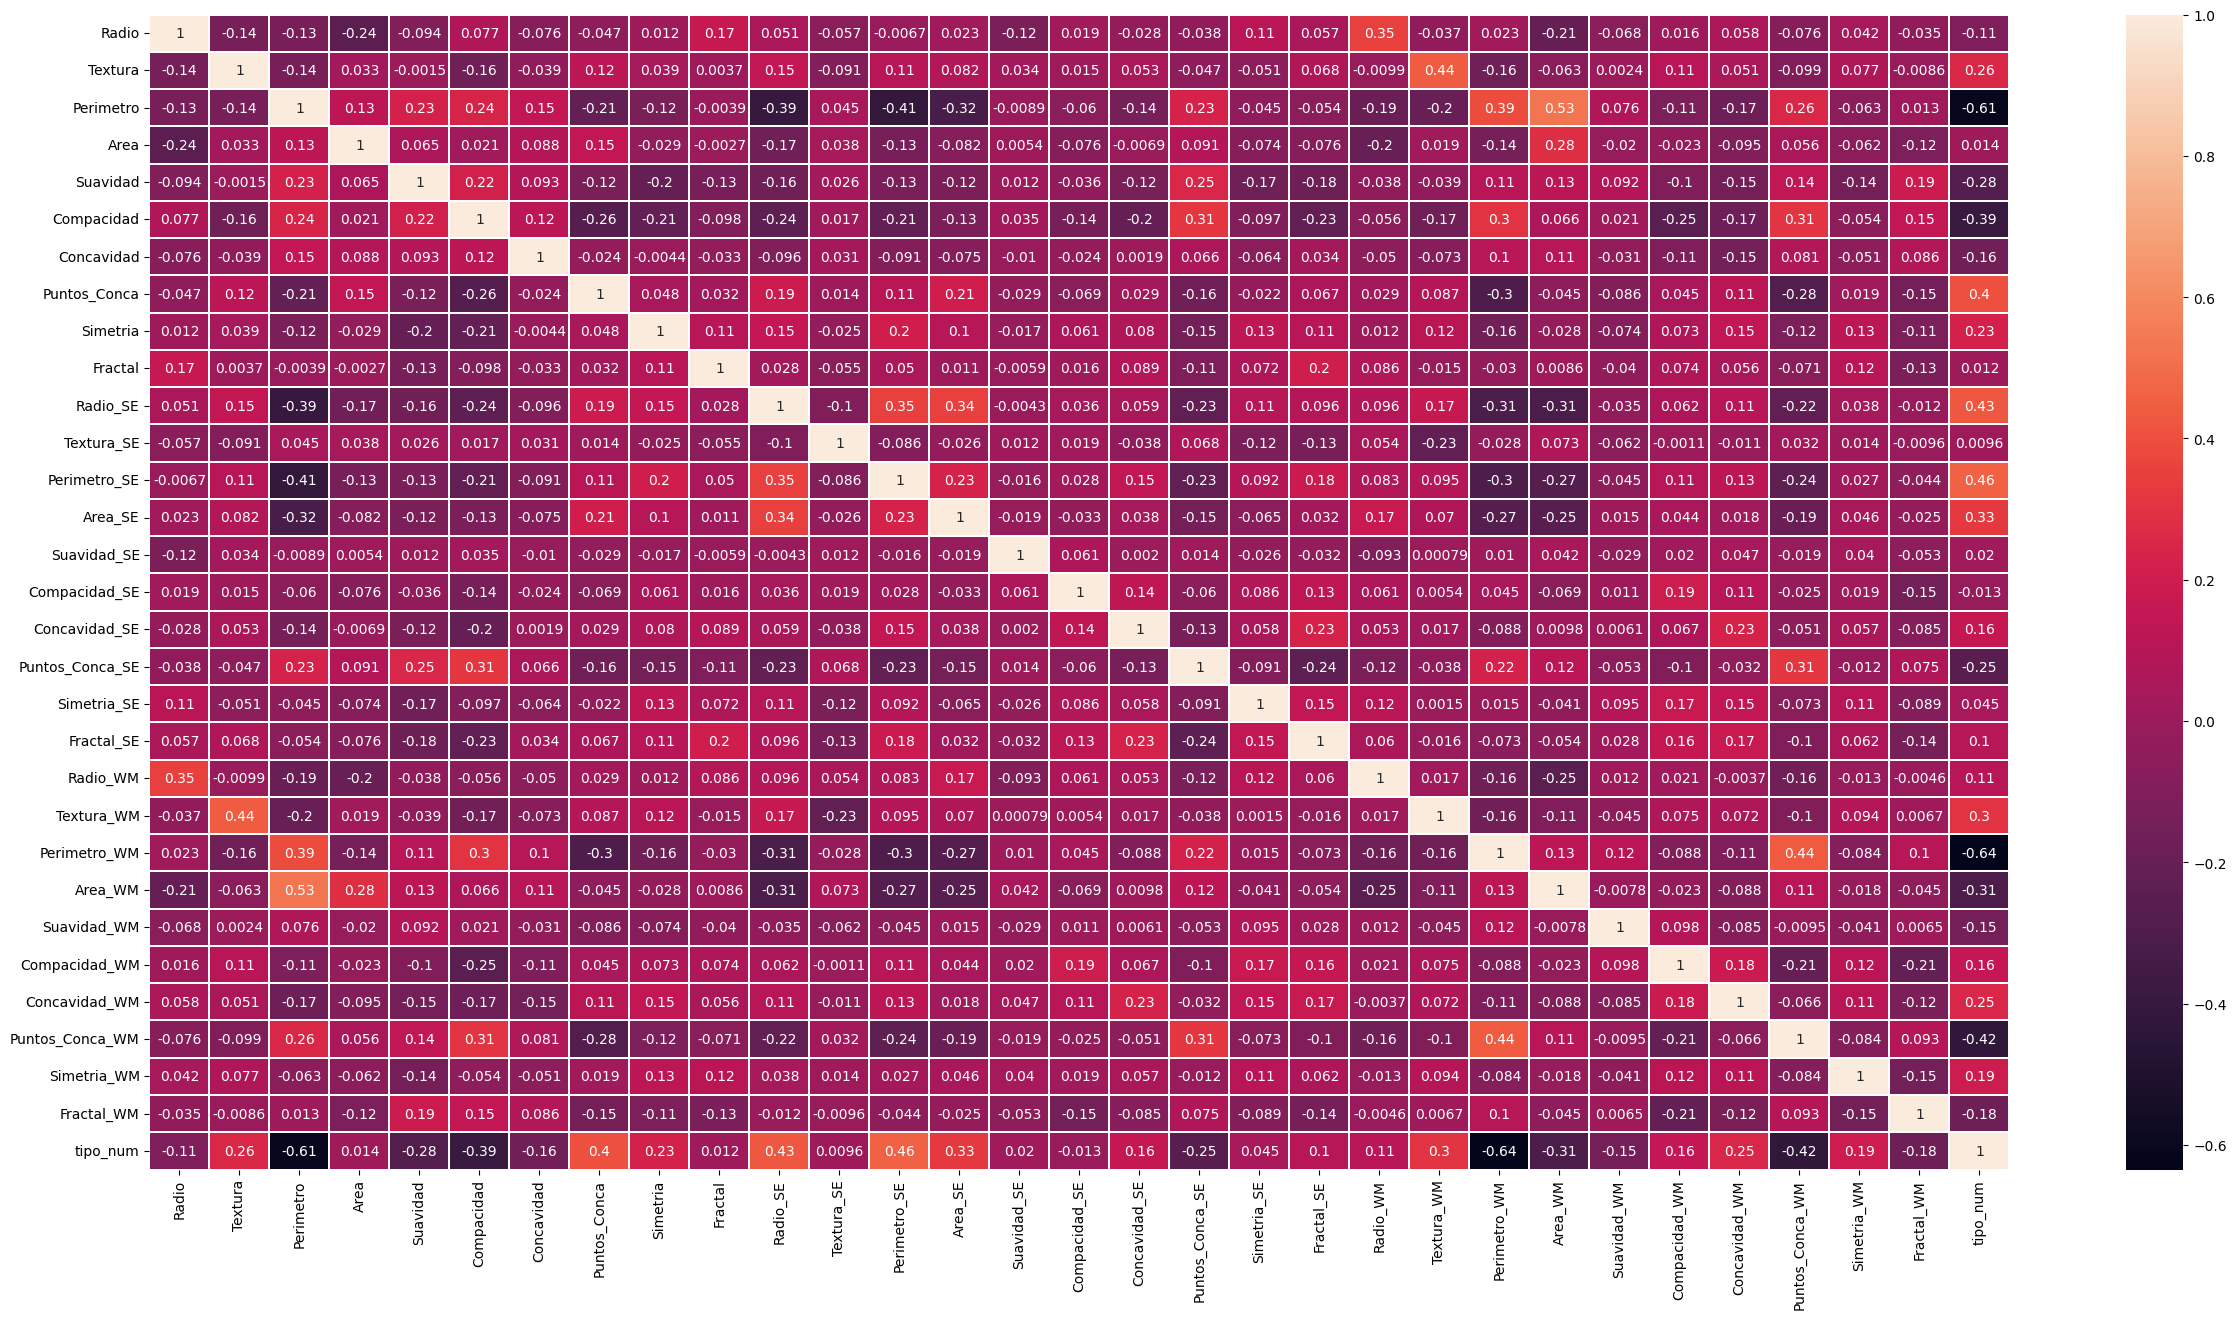

In [19]:
df_data = datos.drop('Tipo', axis=1)
plt.figure(figsize = (30,15))
c=df_data.corr()
sns.heatmap(c, annot=True, linewidths=.1)

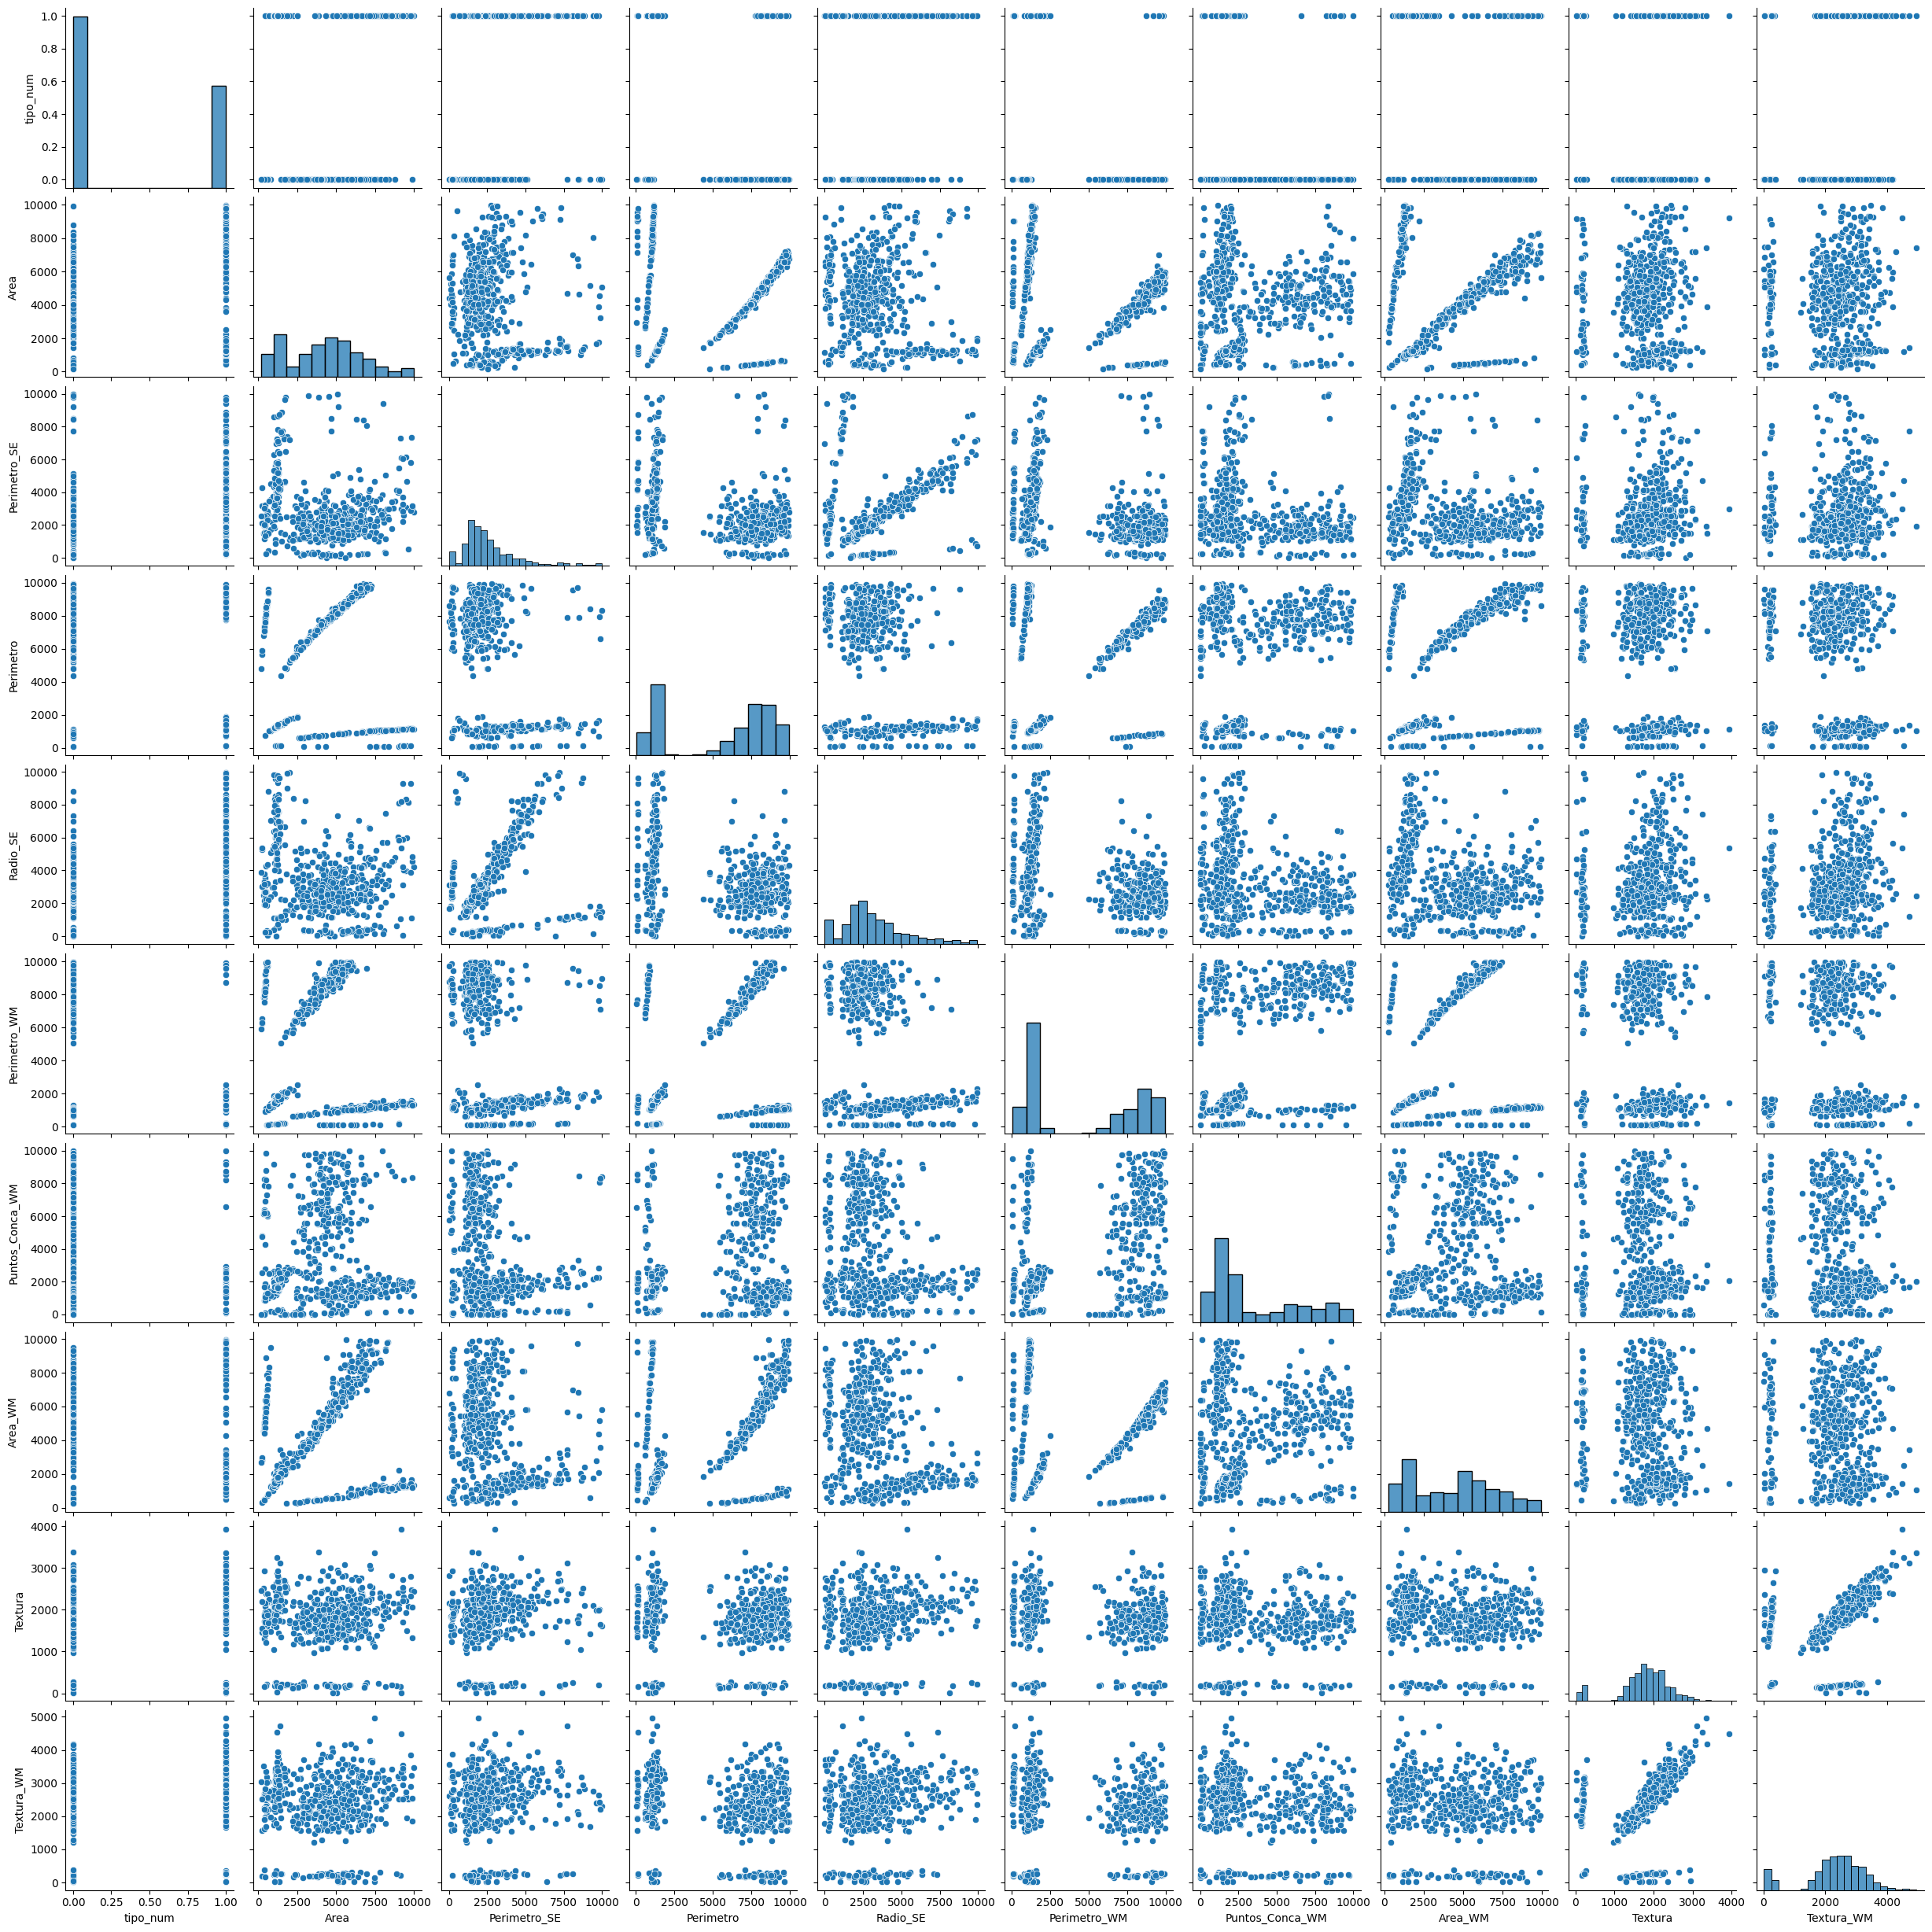

In [23]:
sns.pairplot(datos[["tipo_num","Area", "Perimetro_SE", "Perimetro", "Radio_SE", "Perimetro_WM", "Puntos_Conca_WM", "Area_WM", "Textura","Textura_WM"]])

### Paso 3: Preprocesamiento de los Datos

In [28]:
X1 = datos[['Perimetro' , 'Area_WM']].iloc[: , :].values
X1[0:5]

array([[1228, 2019],
       [1329, 1956],
       [ 130, 1709],
       [7758, 5677],
       [1351, 1575]])

In [29]:
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

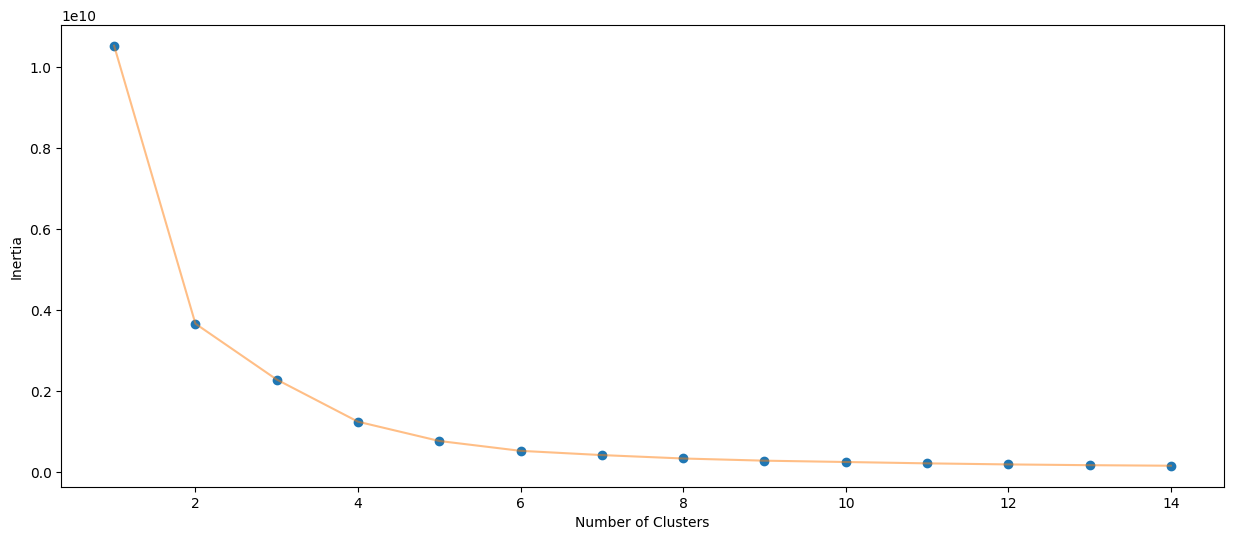

In [30]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Paso 4: Aplicar Modelos de Clustering
#### Clustering K-Means

In [31]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

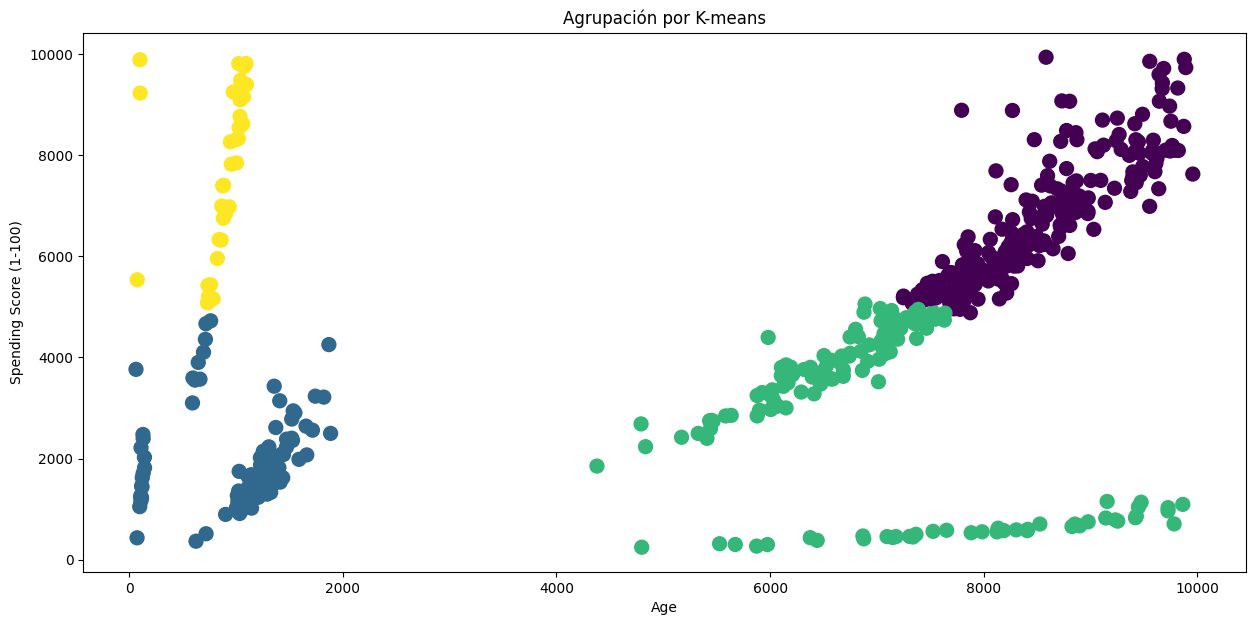

In [32]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
plt.scatter( x = 'Perimetro', y = 'Area_WM', data = datos, c = labels1, s = 100)
#plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Agrupación por K-means')
plt.show()

#### Clustering Jerárquico

In [35]:
jer = datos[['Perimetro' , 'Area_WM']]
jer.head()

,Perimetro,Area_WM
ID,,
842302,1228,2019
842517,1329,1956
84300903,130,1709
84348301,7758,5677
84358402,1351,1575


<Axes: title={'center': 'Agrupación Jerárquica'}, xlabel='Perimetro', ylabel='Area_WM'>

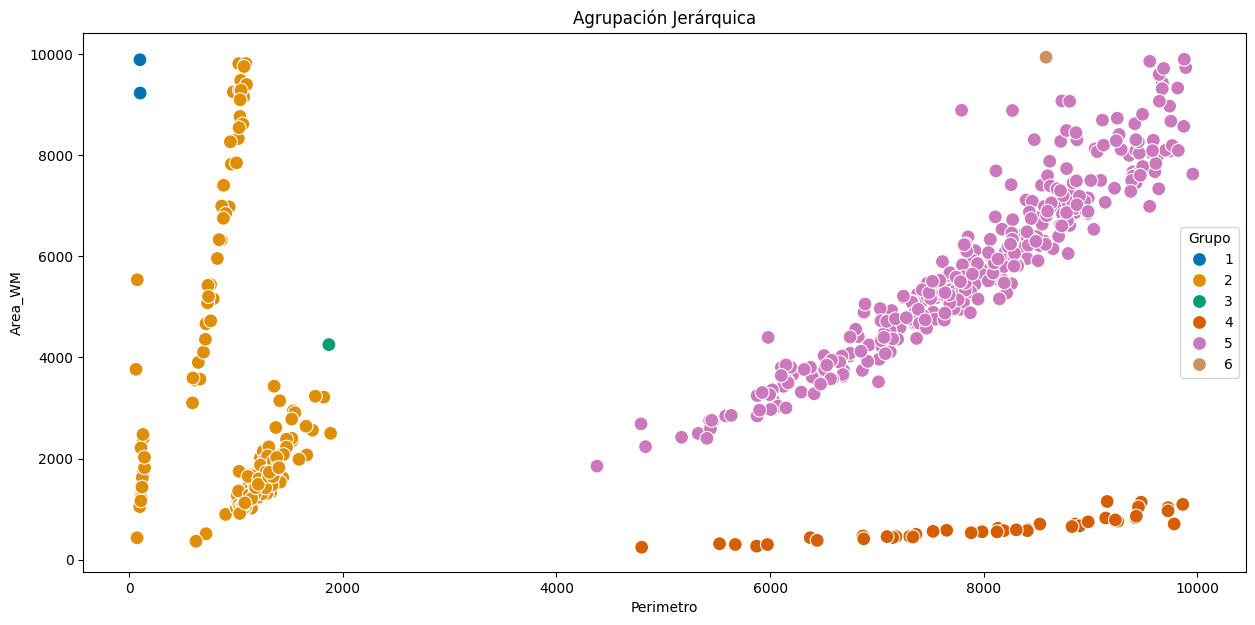

In [42]:
# Use the linkage()
distance_matrix = linkage(jer, method='single', metric='euclidean')

# Assign cluster labels
numero_grupos = 6
# maxclust: En cuentra la distancia óptima entre dos observaciones para la creación de grupos
jer['Grupo'] = fcluster(distance_matrix, numero_grupos, criterion='maxclust')

# Plot clusters
plt.figure(2 , figsize = (15 , 7) )
plt.title('Agrupación Jerárquica')
sns.scatterplot(x='Perimetro', y='Area_WM', s=100, hue='Grupo', data=jer, palette='colorblind')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [44.6875, 44.6875, 111.25, 111.25],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [77.96875, 77.96875, 153.75, 153.75],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [385.0, 385.0, 395.0, 395.0],
  [415.0, 415.0, 425.0, 425.0],
  [405.0, 405.0, 420.0, 420.0],
  [445.0, 445.0, 455.0, 455.0],
  [475.0, 475.0, 485.0, 485.0],
  [495.0, 495.0, 505.0, 505.0],
  [515.0, 515.0, 525.0, 525.0],
  [535.0, 535.0, 545.0, 545.0],
  [520.0, 520.0, 540.0, 540.0],
  [500.0, 500.0, 530.0, 530.0],
  [565.0, 565.0, 575.0, 575.0],
  [5

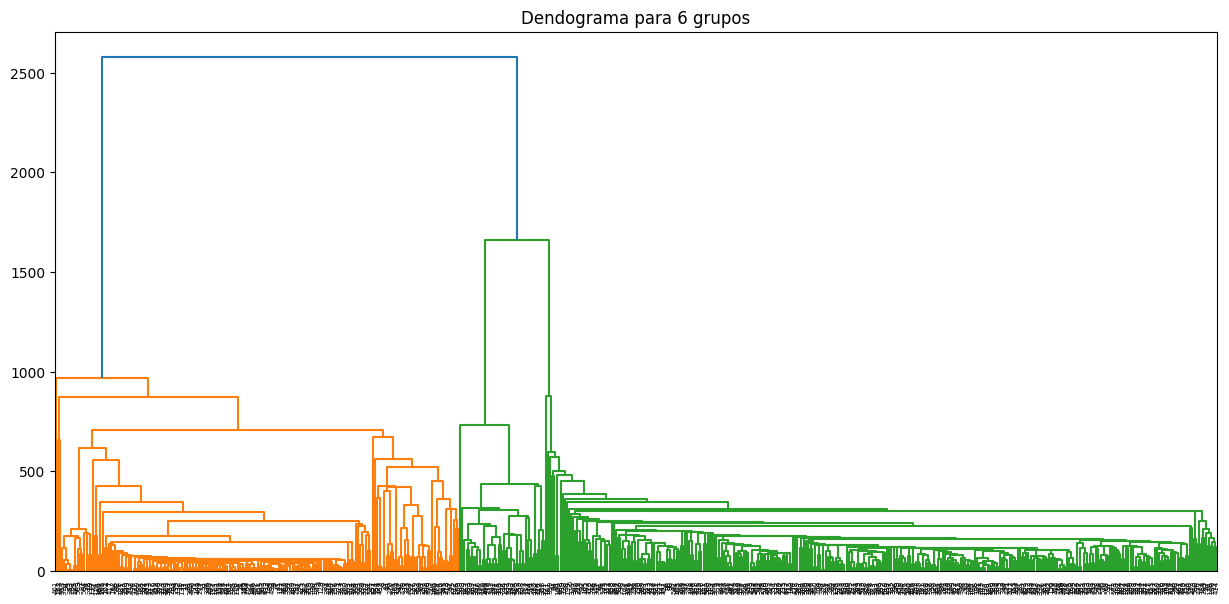

In [49]:
plt.figure(3 , figsize = (15 , 7) )
plt.title('Dendograma para 6 grupos')
dendrogram(distance_matrix)

In [44]:
X1[0:5]

array([[1228, 2019],
       [1329, 1956],
       [ 130, 1709],
       [7758, 5677],
       [1351, 1575]])

In [46]:
# eps: distancia máxima
# min_samples: número de datos para ser popular
modeloDensidad = DBSCAN(eps=6, min_samples=3).fit(jer)
etiquetas = modeloDensidad.labels_
modeloDensidad

DBSCAN(eps=6, min_samples=3)

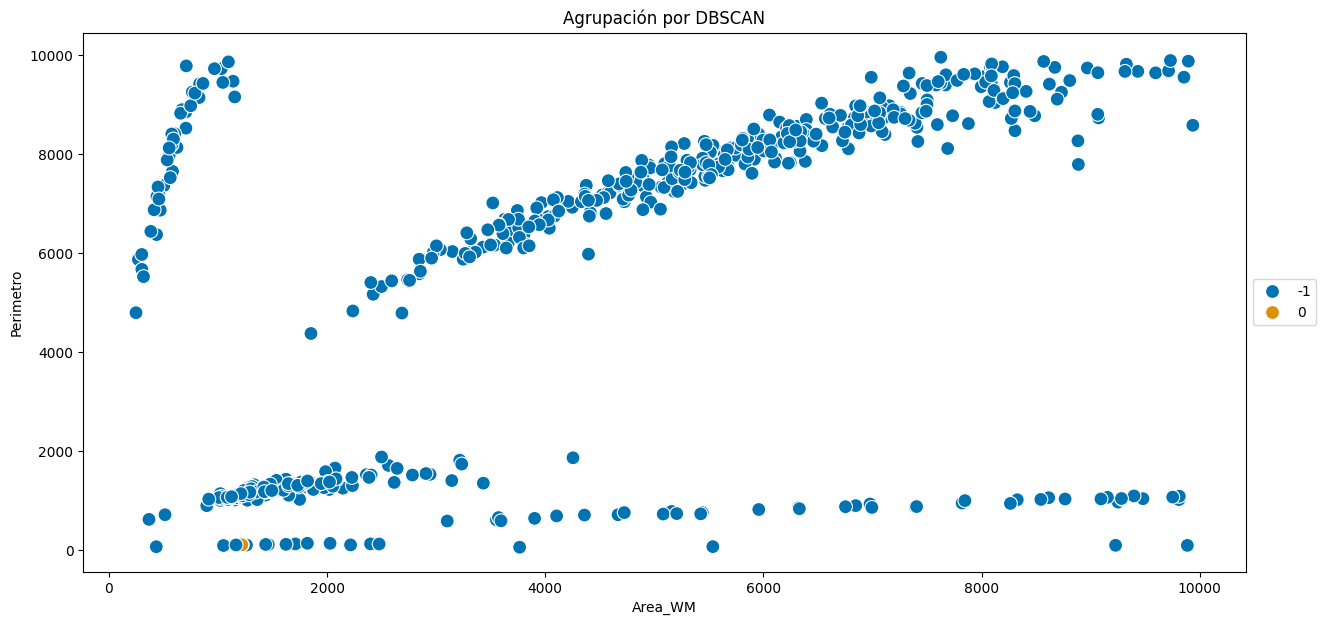

In [48]:
plt.figure(3 , figsize = (15 , 7) )
plt.title('Agrupación por DBSCAN')
c= sns.scatterplot(x='Area_WM', y='Perimetro', s=100, hue=etiquetas, data=jer, palette='colorblind')
c.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

### Paso 5: Análisis de Resultados

### Paso 6: Conclusiones y Discusión
1. **Reflexión sobre la metodología**:
   - Ventajas y desventajas de K-Means y Clustering Jerárquico.
   - Situaciones ideales para usar cada técnica.
2. **Posibles mejoras y siguientes pasos**:
   - Probar con diferentes números de clusters.
   - Utilizar otras técnicas de clustering como DBSCAN.
   - Integrar análisis de outliers y su impacto en los clusters.